LZ77 ALGORITHM


In [7]:
""" Lz77 algorithm module """
import matplotlib.pyplot as plt
import time


class LZ77:
    def __init__(self, window_size: int):
        self.window_size = window_size

    def encode(self, text):
        """
        Encoding
        """
        compressed = []
        index = 0

        while index < len(text):
            best_offset = -1
            best_length = -1
            best_match = ''

            # Search for the longest match in the sliding window
            for length in range(1, min(len(text) - index, self.window_size)):
                substring = text[index:index + length]
                offset = text.rfind(substring, max(0, index - self.window_size), index)

                if offset != -1 and length > best_length:
                    best_offset = index - offset
                    best_length = length
                    best_match = substring

            if best_match:
                # Add the (offset, length, next_character) tuple to the compressed data
                compressed.append((best_offset, best_length, text[index + best_length]))
                index += best_length + 1
            else:
                # No match found, add a zero-offset tuple
                compressed.append((0, 0, text[index]))
                index += 1

        return compressed

    def decode(self, encoded_list: list) -> str:
        """
        Decoding
        """
        result = ""
        for item in encoded_list:
            offset, length, next_char = item
            result += result[-offset:][:length] + next_char
        return result


Метод encode сканує текст та створює стиснену версію, використовуючи трійки (зсув, довжина, наступний символ). Для кожної позиції у тексті, алгоритм шукає найдовший збіг вікном заданого розміру, позначає його як трійку і зсувається далі. Якщо збіг не знайдено, то додається трійка з нульовим зсувом.

Метод decode використовує закодовані трійки для відновлення оригінального тексту. Для кожної трійки він використовує зсув та довжину для вибору підстрічки з попередніх символів та додає наступний символ.

Н амою думку, цей алгоритм ефективно стискує повторювані фрагменти в тексті, зменшуючи загальний об'єм інформації. Однак для деяких видів даних та текстів інші алгоритми стиснення можуть бути більш ефективними.

In [8]:
def measure_execution_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    execution_time = end_time - start_time
    return result, execution_time

def visualize_execution_time(small_file_time, big_file_time):
    plt.bar(['Small File', 'Big File'], [small_file_time, big_file_time], color=['blue', 'orange'])
    plt.ylabel('Execution Time (seconds)')
    plt.title('LZ77 Algorithm Execution Time Comparison')
    plt.show()

Тестування алгоритму на менших даних

In [9]:
window_size = 5
lz77 = LZ77(window_size)

original_text = 'The quick brown fox jumps over the lazy dog. The quick brown dog jumps over the lazy fox.'

compressed_list = lz77.encode(original_text)

print(f"Compressed List: {compressed_list}")

decoded_text = lz77.decode(compressed_list)

print(f"Decoded Text: {decoded_text}")

if original_text == decoded_text:
    print("Test Passed: Original and Decoded texts match.")
else:
    print("Test Failed: Original and Decoded texts do not match.")

Compressed List: [(0, 0, 'T'), (0, 0, 'h'), (0, 0, 'e'), (0, 0, ' '), (0, 0, 'q'), (0, 0, 'u'), (0, 0, 'i'), (0, 0, 'c'), (0, 0, 'k'), (0, 0, ' '), (0, 0, 'b'), (0, 0, 'r'), (0, 0, 'o'), (0, 0, 'w'), (0, 0, 'n'), (0, 0, ' '), (0, 0, 'f'), (5, 1, 'x'), (4, 1, 'j'), (0, 0, 'u'), (0, 0, 'm'), (0, 0, 'p'), (0, 0, 's'), (0, 0, ' '), (0, 0, 'o'), (0, 0, 'v'), (0, 0, 'e'), (0, 0, 'r'), (5, 1, 't'), (0, 0, 'h'), (5, 1, ' '), (0, 0, 'l'), (0, 0, 'a'), (0, 0, 'z'), (0, 0, 'y'), (5, 1, 'd'), (0, 0, 'o'), (0, 0, 'g'), (0, 0, '.'), (5, 1, 'T'), (0, 0, 'h'), (0, 0, 'e'), (4, 1, 'q'), (0, 0, 'u'), (0, 0, 'i'), (0, 0, 'c'), (0, 0, 'k'), (0, 0, ' '), (0, 0, 'b'), (0, 0, 'r'), (0, 0, 'o'), (0, 0, 'w'), (0, 0, 'n'), (0, 0, ' '), (0, 0, 'd'), (5, 1, 'g'), (4, 1, 'j'), (0, 0, 'u'), (0, 0, 'm'), (0, 0, 'p'), (0, 0, 's'), (0, 0, ' '), (0, 0, 'o'), (0, 0, 'v'), (0, 0, 'e'), (0, 0, 'r'), (5, 1, 't'), (0, 0, 'h'), (5, 1, ' '), (0, 0, 'l'), (0, 0, 'a'), (0, 0, 'z'), (0, 0, 'y'), (5, 1, 'f'), (0, 0, 'o'), (0, 0, 

Оцінка ступеня стиснення відносно розміру вхідних даних (у відсотках)

In [10]:
def calculate_compression_ratio(original_size, compressed_size):
    compression_ratio = (compressed_size / original_size) * 100
    return compression_ratio

original_text = "Your original text here"
window_size = 5  # Your window size
lz77_encoder = LZ77(window_size)

# Encode the original text
encoded_data = lz77_encoder.encode(original_text)

# Get original and compressed sizes
original_size = len(original_text)
compressed_size = len(encoded_data)

# Print sizes
print(f"Original size: {original_size} bytes")
print(f"Compressed size: {compressed_size} bytes")

# Estimate compression ratio
compression_ratio = calculate_compression_ratio(original_size, compressed_size)
print(f"Compression ratio: {compression_ratio:.2f}%")

Original size: 23 bytes
Compressed size: 19 bytes
Compression ratio: 82.61%


Тестування алгоритму на більших даних


In [11]:
lz77 = LZ77(window_size)

original_text = 'bwfcfwgfuyeqgf  fgquerfbcgfuq querfcbndkiweigupowfh \
lfvcuyagwn gyt w seguvhaifjsvb vjaz \
kjafb errbgc qkwoaspoh jbdoudf8y fisfgqhudfc \
jfeeuwjfwief t deh owhv qc qgtyftr ksntrpknb \
awsdf ddxcfvgb \
hgvffgul fvbnmfv wertyuik ertyuiovd fddxcv \
jshGTC Dcxs vgcbgestwfrgwhojhgv fwsiugdfssxcvsd fdgj \
tsxcvb, dfghjkluytdcvbmnbv srtyuiosx qwertydfghjk \
dcfyuird dfghcbnytfdx tyhjcsjjv xtytujvxs  ftyghxs \
bwfcfwgfuyeqgf  fgquerfbcgfuq querfcbndkiweigupowfh \
lfvcuyagwn gyt w seguvhaifjsvb vjaz \
kjafb errbgc qkwoaspoh jbdoudf8y fisfgqhudfc \
jfeeuwjfwief t deh owhv qc qgtyftr ksntrpknb \
awsdf ddxcfvgb \
hgvffgul fvbnmfv wertyuik ertyuiovd fddxcv \
jshhgc cvsd fdgj \
tsxcvb dfghjkluytdcvbmnbv sdfghj \
dcfyuird dfghcbnytfdx tyhjcsjjv xtytujvxs  ftyghxs \
bwfcfwgfuyeqgf  fgquerfbcgfuq querfcbndkiweigupowfh \
lfvcuyagwn gyt w fghjkl \
kjafb errbgc qkwoasgqdbbjqk fisfgqhudfc \
jfeeuwjfwief t deh owhv qc qgtyftr ksntrpknb \
awsdf ddxcfvgb \
hgvffgul fvbnmfv wertyuik ertyuiovd fddxcv \
jshGTC Dcxs vgcbgestwfrgwhojhgv fwsiugdfssxcvsd fdgj \
tsxcv ehujfkoa ertyu dcvbmnbv srtyuiosx qwertyui \
dcfyuird tyu tyhgvcdf s fghjk'

compressed_list = lz77.encode(original_text)

print(f"Compressed List: {compressed_list}")

decoded_text = lz77.decode(compressed_list)

print(f"Decoded Text: {decoded_text}")

if original_text == decoded_text:
    print("Test Passed: Original and Decoded texts match.")
else:
    print("Test Failed: Original and Decoded texts do not match.")

Compressed List: [(0, 0, 'b'), (0, 0, 'w'), (0, 0, 'f'), (0, 0, 'c'), (2, 1, 'w'), (0, 0, 'g'), (3, 1, 'u'), (0, 0, 'y'), (0, 0, 'e'), (0, 0, 'q'), (0, 0, 'g'), (0, 0, 'f'), (0, 0, ' '), (1, 1, 'f'), (5, 1, 'q'), (0, 0, 'u'), (0, 0, 'e'), (0, 0, 'r'), (0, 0, 'f'), (0, 0, 'b'), (0, 0, 'c'), (0, 0, 'g'), (4, 1, 'u'), (0, 0, 'q'), (0, 0, ' '), (2, 1, 'u'), (0, 0, 'e'), (0, 0, 'r'), (0, 0, 'f'), (0, 0, 'c'), (0, 0, 'b'), (0, 0, 'n'), (0, 0, 'd'), (0, 0, 'k'), (0, 0, 'i'), (0, 0, 'w'), (0, 0, 'e'), (3, 1, 'g'), (0, 0, 'u'), (0, 0, 'p'), (0, 0, 'o'), (0, 0, 'w'), (0, 0, 'f'), (0, 0, 'h'), (0, 0, ' '), (0, 0, 'l'), (4, 1, 'v'), (0, 0, 'c'), (0, 0, 'u'), (0, 0, 'y'), (0, 0, 'a'), (0, 0, 'g'), (0, 0, 'w'), (0, 0, 'n'), (0, 0, ' '), (4, 1, 'y'), (0, 0, 't'), (4, 1, 'w'), (2, 1, 's'), (0, 0, 'e'), (0, 0, 'g'), (0, 0, 'u'), (0, 0, 'v'), (0, 0, 'h'), (0, 0, 'a'), (0, 0, 'i'), (0, 0, 'f'), (0, 0, 'j'), (0, 0, 's'), (0, 0, 'v'), (0, 0, 'b'), (0, 0, ' '), (3, 1, 'j'), (0, 0, 'a'), (0, 0, 'z'), (5, 1, 

Створення візуалізації


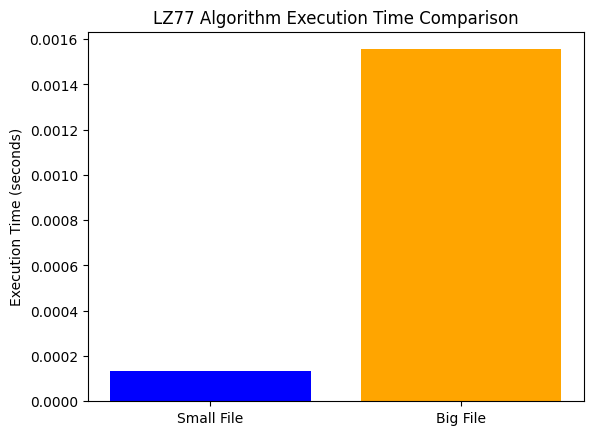

In [12]:
def main():
    window_size = 5
    lz77 = LZ77(window_size)

    # Small file
    original_text_small = "The quick brown fox jumps over the lazy dog. The quick brown dog jumps over the lazy fox."
    
    _, small_file_time = measure_execution_time(lz77.encode, original_text_small)

    # Big file
    original_text_big = 'bwfcfwgfuyeqgf  fgquerfbcgfuq querfcbndkiweigupowfh \
lfvcuyagwn gyt w seguvhaifjsvb vjaz \
kjafb errbgc qkwoaspoh jbdoudf8y fisfgqhudfc \
jfeeuwjfwief t deh owhv qc qgtyftr ksntrpknb \
awsdf ddxcfvgb \
hgvffgul fvbnmfv wertyuik ertyuiovd fddxcv \
jshGTC Dcxs vgcbgestwfrgwhojhgv fwsiugdfssxcvsd fdgj \
tsxcvb, dfghjkluytdcvbmnbv srtyuiosx qwertydfghjk \
dcfyuird dfghcbnytfdx tyhjcsjjv xtytujvxs  ftyghxs \
bwfcfwgfuyeqgf  fgquerfbcgfuq querfcbndkiweigupowfh \
lfvcuyagwn gyt w seguvhaifjsvb vjaz \
kjafb errbgc qkwoaspoh jbdoudf8y fisfgqhudfc \
jfeeuwjfwief t deh owhv qc qgtyftr ksntrpknb \
awsdf ddxcfvgb \
hgvffgul fvbnmfv wertyuik ertyuiovd fddxcv \
jshhgc cvsd fdgj \
tsxcvb dfghjkluytdcvbmnbv sdfghj \
dcfyuird dfghcbnytfdx tyhjcsjjv xtytujvxs  ftyghxs \
bwfcfwgfuyeqgf  fgquerfbcgfuq querfcbndkiweigupowfh \
lfvcuyagwn gyt w fghjkl \
kjafb errbgc qkwoasgqdbbjqk fisfgqhudfc \
jfeeuwjfwief t deh owhv qc qgtyftr ksntrpknb \
awsdf ddxcfvgb \
hgvffgul fvbnmfv wertyuik ertyuiovd fddxcv \
jshGTC Dcxs vgcbgestwfrgwhojhgv fwsiugdfssxcvsd fdgj \
tsxcv ehujfkoa ertyu dcvbmnbv srtyuiosx qwertyui \
dcfyuird tyu tyhgvcdf s fghjk'

    _, big_file_time = measure_execution_time(lz77.encode, original_text_big)

    visualize_execution_time(small_file_time, big_file_time)

if __name__ == "__main__":
    main()